In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('train.csv')

# count_patients = df.patient_id.unique().size

print("Columns:", df.columns)
print("Number of samples:", len(df))
print("Number of samples with cancer:", len(df[df["cancer"]==1]))
print("Number of samples with no cancer:", len(df[df["cancer"]==0]))
# print("Number of patients:", count_patients)

#laterality = left or right
# density = A rating for how dense the breast tissue is,
#           A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. 


Columns: Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case'],
      dtype='object')
Number of samples: 54706
Number of samples with cancer: 1158
Number of samples with no cancer: 53548


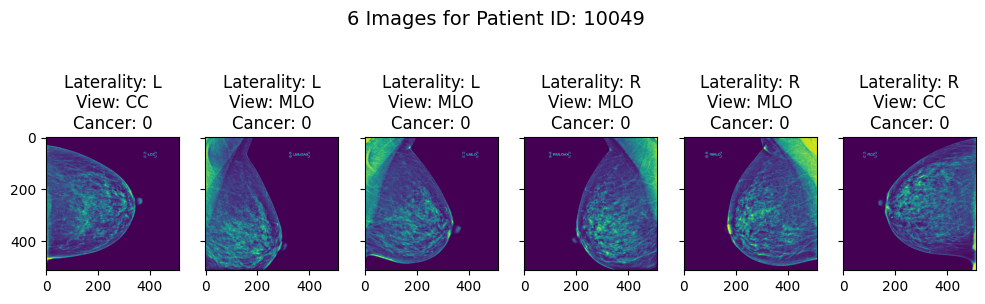

In [6]:
# get a patient's image with patient ID

# selected_patient_id = 53727
selected_patient_id = 10049
selected_patient_df = df.loc[df["patient_id"] == selected_patient_id]
# print(selected_patient_df)
image_count_selected_patient = len(df.loc[df["patient_id"] == selected_patient_id])

img_links = []
for index, row in selected_patient_df.iterrows():
    img_file_name = str(row["patient_id"])+"_"+str(row["image_id"])+".png"
    # print('/images/'+img_file_name)
    img = np.asarray(Image.open('images/'+img_file_name))
    img_links.append(img_file_name)



f, axarr = plt.subplots(1, image_count_selected_patient, 
                        sharey=True,
                        figsize=(12, 4))
f.suptitle(f'{image_count_selected_patient} Images for Patient ID: {selected_patient_id}', fontsize=14)

counter_img = 0
for index, row in selected_patient_df.iterrows():
    img = np.asarray(Image.open('images/'+img_links[counter_img]))
    axarr[counter_img].imshow(img)
    axarr[counter_img].set_title("Laterality: "+str(row["laterality"])+"\n"+
                                "View: "+str(row["view"])+"\n"+
                                "Cancer: "+str(row["cancer"]))
    counter_img+=1

